In [16]:
import pandas as pd

In [17]:
egdi = pd.read_csv('EGOV_DATA_2022.csv')

In [18]:
epart = egdi.melt(
    id_vars='Country Name',
    value_vars='E-Participation Index',
    var_name='EPART',
    value_name='Porcentagem',
    
)

In [19]:
epart['Country Name'] = epart['Country Name'].sort_values(ascending=True).reset_index(drop=True)

In [20]:
gov_expenditure = pd.read_excel('imf_government_expenditure.xls')

In [21]:
gov_expenditure['Country'] = gov_expenditure['Country'].sort_values(ascending=True)

In [22]:
paises = gov_expenditure['Country'].unique().tolist()

In [23]:
epart = epart[epart['Country Name'].isin(paises)].reset_index(drop=True)

In [24]:
paises = epart['Country Name'].unique().tolist()

In [25]:
gov_expenditure = gov_expenditure[gov_expenditure['Country'].isin(paises)].reset_index(drop=True)

In [26]:
dispersao = pd.DataFrame()

In [27]:
dispersao["Gastos do governo (% do PIB)"] = gov_expenditure['Percentage']

In [28]:
dispersao['E-Participation Development Index'] = epart['Porcentagem']

In [29]:
dispersao['Gastos do governo (% do PIB)'] = dispersao['Gastos do governo (% do PIB)'].apply(lambda x: x/100.0)

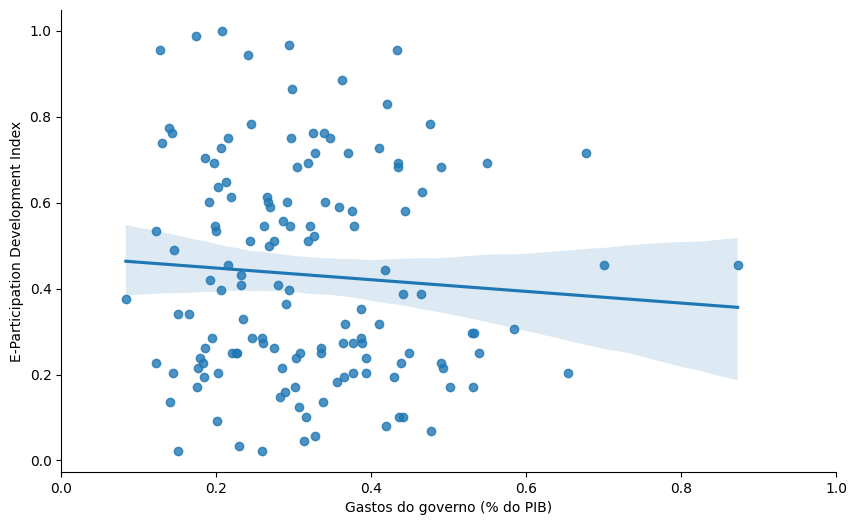

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.regplot(dispersao, x="Gastos do governo (% do PIB)", y='E-Participation Development Index')

sns.despine()
plt.xlim(0, 1)
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/egdi/dispersao_epart_govexpenditure.png', dpi=300, bbox_inches='tight')
plt.show()